In [ ]:
### premier exemple pour tester la fonction de Fourier

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Exemple de données de constituants pour le port (fictif)
constituants = [
    {"nom": "M2", "amplitude": 1.0, "phase": 0.0, "vitesse": 28.9841042},
    {"nom": "S2", "amplitude": 0.5, "phase": 0.0, "vitesse": 30.0},
    # Ajoutez d'autres constituants ici
]

# Niveau moyen de l'eau (Z0) pour le port
Z0 = 2.0  # mètres

def hauteur_eau(t, constituants, Z0):
    hauteur = Z0
    for constituant in constituants:
        A = constituant["amplitude"]
        phase = constituant["phase"]
        vitesse = constituant["vitesse"]
        hauteur += A * np.cos(vitesse * t + phase)
    return hauteur

# Convertir une date et heure en temps 't' (en heures depuis le début de l'année)
def convertir_temps(date_heure):
    debut_annee = datetime(date_heure.year, 1, 1)
    delta = date_heure - debut_annee
    return delta.total_seconds() / 3600.0

# Prédiction pour une date et heure spécifique
date_heure_specifique = datetime(2023, 3, 17, 12)  # 17 Mars 2023 à 12h00
t_specifique = convertir_temps(date_heure_specifique)
hauteur_specifique = hauteur_eau(t_specifique, constituants, Z0)

print(f"Prédiction de la hauteur d'eau: {hauteur_specifique} mètres")

# Pour la visualisation sur une journée entière
temps = np.linspace(0, 24, 100)  # 24 heures
hauteurs = [hauteur_eau(convertir_temps(date_heure_specifique + timedelta(hours=t)), constituants, Z0) for t in temps]

plt.plot(temps, hauteurs, label="Hauteur d'eau")
plt.xlabel("Heure")
plt.ylabel("Hauteur d'eau (mètres)")
plt.title("Prédiction de la hauteur d'eau sur 24 heures")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### pour Point Reyes, CA

import numpy as np

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# NOAA tidal constituents for Point Reyes, CA (amplitudes are in feet, phases in degrees, and speeds in degrees per hour)
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    # Add all other constituents here
]

# Convert amplitude from feet to meters, and convert phase and speed from degrees to radians
# The speed needs to be converted from degrees per hour to radians per second (for use in the time conversion)
constituents_converted = [(name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600)
                          for name, amp, phase, speed in constituents]

# Time reference
# This will be used to calculate the number of seconds from the epoch to the prediction time
epoch = np.datetime64('1983-01-01T00:00:00Z')  # Start of the NTDE

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch) / np.timedelta64(1, 's')
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for name, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Example usage:
# Predict the tide for March 17, 2024 at 12:00 UTC
prediction_time = np.datetime64('2024-03-17T12:00:00Z')
predicted_tide_height = tide_height(prediction_time, constituents_converted)

print(f"The predicted tide height at Point Reyes, CA on March 17, 2024, at 12:00 UTC is {predicted_tide_height:.3f} meters relative to MSL.")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    # Add all other constituents here
]

# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot_date(times_plt, predicted_heights, '-', label='Predicted Tide', color='blue')
plt.axhline(0, color='black', linewidth=0.7, label='MSL')  # Add Mean Sea Level line

# Formatting the plot
plt.title('Predicted Tide Levels for Point Reyes, CA (NOAA)')
plt.ylabel('Height (meters)')
plt.xlabel('Time (GMT)')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()  # Auto format the date on x-axis
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


In [ ]:
### with all constituents

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]


# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot_date(times_plt, predicted_heights, '-', label='Predicted Tide', color='blue')
plt.axhline(0, color='black', linewidth=0.7, label='MSL')  # Add Mean Sea Level line

# Formatting the plot
plt.title('Predicted Tide Levels for Point Reyes, CA (NOAA)')
plt.ylabel('Height (meters)')
plt.xlabel('Time (GMT)')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()  # Auto format the date on x-axis
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


In [ ]:
### NOAA

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Chemin vers le fichier CSV de la NOAA
noaa_csv_path = 'CO-OPS_9415020_met.csv'

# Lire le fichier CSV en utilisant pandas
noaa_data = pd.read_csv(noaa_csv_path)

# Convertir les colonnes 'Date' et 'Time' en un seul objet datetime
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])

# Assurer que les données sont triées par datetime
noaa_data.sort_values('Datetime', inplace=True)

# Convertir les hauteurs d'eau en mètres si elles ne le sont pas déjà
# Ici, on suppose que les données sont déjà en mètres, donc pas de conversion nécessaire

# Filtrer les données pour la période souhaitée
start_date = '2024-01-01 00:00'
end_date = '2024-01-01 23:59'
mask = (noaa_data['Datetime'] >= start_date) & (noaa_data['Datetime'] <= end_date)
filtered_data = noaa_data.loc[mask]

# Tracer les données
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Datetime'], filtered_data['Predicted (m)'], label='NOAA Predicted')
plt.plot(filtered_data['Datetime'], filtered_data['Verified (m)'], label='NOAA Verified')

# Ajouter le graphique des prédictions de votre modèle ici

# Formater le graphique
plt.title('NOAA Predicted vs Verified Water Levels')
plt.xlabel('Time (GMT)')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
### la prédiction avec NOAA ensemble

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Read NOAA CSV data for predicted and verified water levels
noaa_csv_path = 'CO-OPS_9415020_met.csv'
noaa_data = pd.read_csv(noaa_csv_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_data.sort_values('Datetime', inplace=True)

# Filter the NOAA data for the same date range as the model predictions
filtered_noaa_data = noaa_data[(noaa_data['Datetime'] >= start_time) & (noaa_data['Datetime'] < start_time + timedelta(days=1))]

# Plot all the data
plt.figure(figsize=(15, 7))

# Plot the model's predicted tide levels
plt.plot_date(times_plt, predicted_heights, '-', label='Model Predicted Tide', color='blue')

# Plot the NOAA predicted tide levels
plt.plot_date(mdates.date2num(filtered_noaa_data['Datetime']), filtered_noaa_data['Predicted (m)'], '-', label='NOAA Predicted Tide', color='orange')

# Plot the NOAA verified tide levels
plt.plot_date(mdates.date2num(filtered_noaa_data['Datetime']), filtered_noaa_data['Verified (m)'], '-', label='NOAA Verified Tide', color='green')

# Formatting the plot
plt.title('Tide Levels: Model Predictions vs NOAA Data')
plt.xlabel('Time (GMT)')
plt.ylabel('Height (meters)')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


In [ ]:
## optimisation des constituants (amplitude et phase)

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Amplitudes are in feet. Phases are in degrees. Speed 
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]


# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Convertir les données de la NOAA en un DataFrame pandas et préparer les données
start_date = '2023-01-01'
end_date = '2023-01-05'
noaa_csv_path = 'CO-OPS_9415020_met.csv'
noaa_data = pd.read_csv(noaa_csv_path)
mask = (noaa_data['Datetime'] >= start_date) & (noaa_data['Datetime'] <= end_date)
noaa_data = noaa_data.loc[mask]
noaa_data = pd.read_csv('01-01_31-12.csv')
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_data['Verified (m)'] = noaa_data['Verified (ft)'] * feet_to_meters  # Convertir en mètres si nécessaire

# Création de la fonction pour calculer la hauteur de marée à un moment donné
def tide_height(time, constituents):
    t_seconds = (time - datetime(1983, 1, 1)).total_seconds()
    height = 0.0
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Fonction de perte pour l'optimisation
def loss_function(params, noaa_data, constituents):
    amplitudes = params[:len(constituents)]
    phases = params[len(constituents):]
    loss = 0.0
    # Dans la fonction de perte
    for index, row in noaa_data.iterrows():
        model_height = tide_height(
            row['Datetime'], 
            [(name, amp, phase, speed) for (name, _, _, speed), amp, phase 
            in zip(constituents, amplitudes, phases)]
        )
        loss += (row['Verified (m)'] - model_height) ** 2
    return loss

# Paramètres initiaux pour l'optimisation (amplitudes et phases actuelles)
initial_params = np.array([amp for _, amp, _, _ in constituents_converted] + [phase for _, _, phase, _ in constituents_converted])

# Exécution de l'optimisation
result = minimize(
    loss_function, 
    initial_params, 
    args=(noaa_data, constituents_converted),
    method='L-BFGS-B',
    options={'disp': False, 'maxiter': 10000}
)

# Après l'optimisation, nous avons de nouveaux paramètres optimisés
optimized_params = result.x

# Les nouveaux paramètres optimisés sont divisés en amplitudes et phases
optimized_amplitudes = optimized_params[:len(constituents_converted)]
optimized_phases = optimized_params[len(constituents_converted):]

# Mettre à jour les constituants avec les paramètres optimisés
constituents_optimized = [(name, amp, phase, speed) 
                          for (name, _, _, speed), amp, phase 
                          in zip(constituents_converted, optimized_amplitudes, optimized_phases)]

# Afficher les constituants optimisés
print("Constituants optimisés :")
for constituent in constituents_optimized:
    name, amplitude, phase, speed = constituent
    print(f"{name}: Amplitude = {amplitude:.4f} m, Phase = {phase:.4f} rad, Speed = {speed:.4f} rad/s")

# Maintenant, avec ces constituants optimisés, vous pouvez calculer les hauteurs de marée prévues
# et les comparer avec les données observées pour évaluer l'optimisation

# Notez que ce script est un squelette de base. Selon les spécificités de vos données et la précision requise,
# des ajustements supplémentaires peuvent être nécessaires.

# Pour sauvegarder les paramètres optimisés pour une utilisation future ou pour analyse :
#optimized_constituents_df = pd.DataFrame(constituents_optimized, columns=['Name', 'Amplitude', 'Phase', 'Speed'])
#optimized_constituents_df.to_csv('optimized_constituents.csv', index=False)

# Affichage des informations sur le processus d'optimisation
if result.success:
    print(f"L'optimisation a réussi après {result.nit} itérations.")
else:
    print("L'optimisation a échoué.")
    print("Message d'erreur :", result.message)


In [ ]:
## OPTIMISATION JAX ET OPTAX

import jax
import jax.numpy as jnp
import optax
import pandas as pd
from datetime import datetime, timedelta
from jax import grad, jit, vmap
from jax.config import config
from jax.scipy.optimize import minimize

config.update("jax_enable_x64", True)

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = jnp.pi / 180

# Data loading and preprocessing
# ... (similar to what you've done before)

# The function that computes the predicted tide height, rewritten for JAX
def tide_height(time, amplitude_phase_speed):
    # Unpack your parameters
    amplitudes, phases, speeds = amplitude_phase_speed
    
    # Ensure you're working with JAX arrays
    amplitudes = jnp.array(amplitudes)
    phases = jnp.array(phases)
    speeds = jnp.array(speeds)

    # Compute the predicted tide height
    t_seconds = (time - datetime(1983, 1, 1)).total_seconds()
    t_seconds = jnp.array(t_seconds)
    
    height = jnp.sum(amplitudes * jnp.cos(speeds * t_seconds + phases))
    return height

# Loss function
def loss_fn(params, times, observed_heights):
    # Split the parameters into amplitudes and phases
    num_constituents = len(params) // 2
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    
    # Predict the tide height for each time
    predictions = vmap(tide_height, in_axes=(0, None))(times, (amplitudes, phases, speeds))
    
    # Compute the loss as the mean squared error
    return jnp.mean((predictions - observed_heights) ** 2)

# Gradient of the loss function
grad_loss_fn = jit(grad(loss_fn))

# Initialization of the optimizer
optimizer = optax.sgd(learning_rate=1e-5)

# Initial parameters
params = jnp.concatenate([initial_amplitudes, initial_phases])

# Optimizer state
opt_state = optimizer.init(params)

# The optimization loop
for epoch in range(num_epochs):
    grads = grad_loss_fn(params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

    # Optional: Print the loss
    if epoch % 100 == 0:
        loss_value = loss_fn(params, times, observed_heights)
        print(f"Epoch {epoch}, Loss: {loss_value}")

# Final optimized parameters
optimized_amplitudes = params[:num_constituents]
optimized_phases = params[num_constituents:]


In [ ]:
## SciPy
 
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime

# Define the constituents
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Load the tide data from CSV
csv_file_path = 'csvFile.csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (ft)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
)

if res.success:
    optimized_params = res.x
    # Split back into amplitudes and phases
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
else:
    print("Optimization failed.")

# Output the result
print(f"Optimized Amplitudes: {optimized_amplitudes}")
print(f"Optimized Phases: {optimized_phases}")



In [ ]:
## avant et après optimisation sciPy

## SciPy
 
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define the constituents
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821)
]

# Load the tide data from CSV
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}  # Example values, adjust as needed
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    # Split back into amplitudes and phases
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Temps d'optimisation: {duration}")  # Afficher le temps d'optimisation
else:
    print("Optimization failed.")
    # Print the error message from the optimization result
    print(f"Optimization failed with message: {res.message}")

# Output the result
print(f"Optimized Amplitudes: {optimized_amplitudes}")
print(f"Optimized Phases: {optimized_phases}")

# Assuming 'optimized_amplitudes' and 'optimized_phases' are available from the optimization
# Generate timestamps for 24 hours of January 1, 2024
start_datetime = datetime(2024, 1, 10)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - datetime(1983, 1, 1).timestamp())

# Predict tide heights for these times using initial and optimized parameters
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(timestamps, predicted_initial, label='Initial Prediction', marker='o')
plt.plot(timestamps, predicted_optimized, label='Optimized Prediction', marker='x')
plt.xlabel('Hour of the Day on 01/01/2024')
plt.ylabel('Tide Height (meters)')
plt.title('24-Hour Tide Height Prediction Before and After Optimization')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)  # Set the x-axis to show hours
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


### SciPy optimized constituents

Optimization successful.
Temps d'optimisation: 0:06:42.578252

Optimized Amplitudes: [ 5.31187725e-01 -1.38622031e-01  1.19762659e-01  4.17513846e-01
  2.70152863e-01  1.19487317e-01 -6.67995568e-04  2.83904086e-04
 -1.73340792e-05  4.50049927e-04 -4.20875768e-04  2.36197169e-02
 -6.97068345e-04  1.34366792e-02  1.45557953e-02 -2.17761142e-02
  1.58900521e-03 -1.26051845e-02  2.31238916e-02 -2.51548371e-02
 -8.18101554e-03 -3.75869519e-02 -7.99158274e-02 -1.25725200e-02
  1.87995936e-02 -1.08637671e-02  4.82834381e-02  7.48778206e-03
  4.49583606e-05  5.81245882e-03  1.34469673e-03  7.89854507e-04
  1.21392320e-02  1.02574311e-03 -5.03362642e-02 -3.23774982e-04
  6.44722747e-05]
  
Optimized Phases: [ 2.26255994 -0.29116668  2.58161412  2.54860388  1.95276676  2.34165457
  4.46606793  1.61568988  3.49912479  0.02347923  4.12820337  2.09094302
  1.16711932  2.70832473  2.92104467  2.96421777  4.13865032  6.6094012
  2.93103746  5.5689751  -0.40881489  3.32051296  4.41951431  1.32774229
  1.04426722  4.64603616  1.93910912  2.92866987  5.02393312  2.09603404
  6.25111351  0.07308492  5.05850645  2.79997185  3.22687261  0.01211869
  3.38865802]

Optimization successful.
Optimization time: 0:00:01.144006
Optimized Constituents:
M2: Amplitude (meters) = 0.5300, Phase (degrees) = 2.2628
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = 0.1192, Phase (degrees) = 2.6025
K1: Amplitude (meters) = 0.4171, Phase (degrees) = 2.5487
O1: Amplitude (meters) = 0.2693, Phase (degrees) = 1.9492
P1: Amplitude (meters) = 0.1192, Phase (degrees) = 2.3408
M4: Amplitude (meters) = -0.0006, Phase (degrees) = 4.5218
RMSE: 0.05833583428897624
Optimized amplitude 


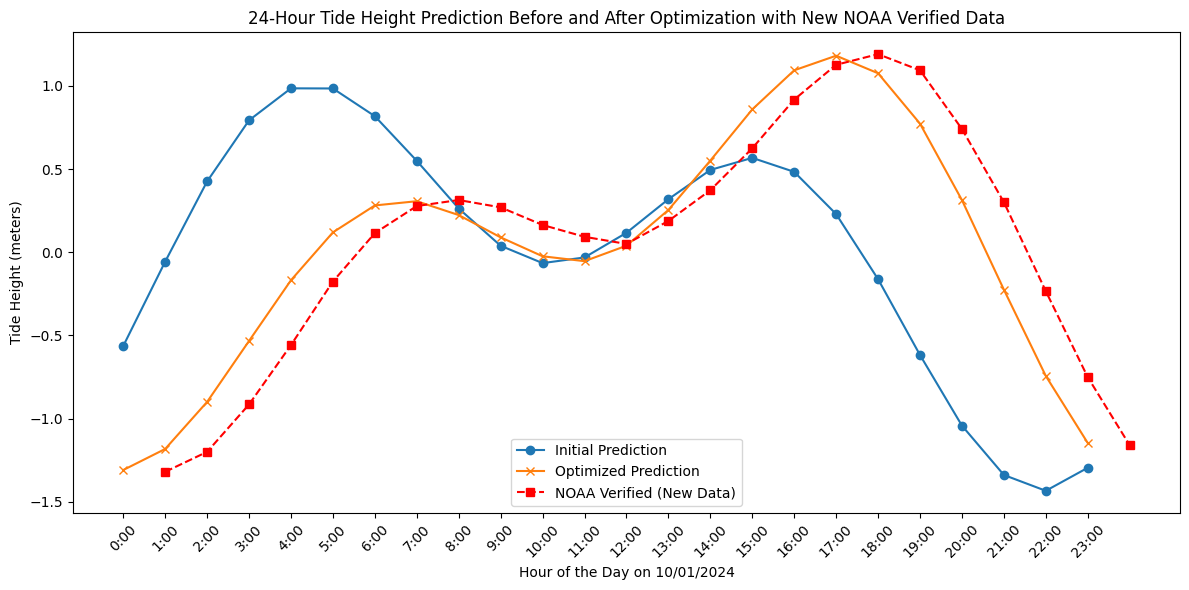

In [ ]:
%matplotlib widget
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the constituents
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821)
]

# Load the tide data from CSV
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")

    # Affichage des constituants optimisés
    print("Optimized Constituents:")
    for i, constituent in enumerate(constituents):
        name = constituent[0]
        print(f"{name}: Amplitude (meters) = {optimized_amplitudes[i]:.4f}, Phase (degrees) = {optimized_phases[i]:.4f}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

# Load the new NOAA data
noaa_data_path = '10-01-2023.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Generate timestamps for predictions
start_datetime = datetime(2024, 1, 10)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using initial and optimized parameters
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

print('Optimized amplitude ' )

plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Initial Prediction', marker='o')
plt.plot(timestamps, predicted_optimized, label='Optimized Prediction', marker='x')
plt.plot(noaa_timestamps, noaa_verified_heights, label='NOAA Verified (New Data)', marker='s', linestyle='--', color='red')
plt.xlabel('Hour of the Day on 10/01/2024')
plt.ylabel('Tide Height (meters)')
plt.title('24-Hour Tide Height Prediction Before and After Optimization with New NOAA Verified Data')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout() # Adjust layout to prevent clipping of tick labels
plt.show()


Optimization successful.
Optimization time: 0:00:01.088715
Optimized Constituents:
M2: Amplitude (meters) = 0.5300, Phase (degrees) = 2.2628
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = 0.1192, Phase (degrees) = 2.6025
K1: Amplitude (meters) = 0.4171, Phase (degrees) = 2.5487
O1: Amplitude (meters) = 0.2693, Phase (degrees) = 1.9492
P1: Amplitude (meters) = 0.1192, Phase (degrees) = 2.3408
M4: Amplitude (meters) = -0.0006, Phase (degrees) = 4.5218
RMSE: 0.05833583428897624
Optimized amplitude

Optimization successful.
Optimization time: 0:09:13.452179
Optimized Constituents:
M2: Amplitude (meters) = 0.5312, Phase (degrees) = 2.2626
S2: Amplitude (meters) = -0.1386, Phase (degrees) = -0.2912
N2: Amplitude (meters) = 0.1198, Phase (degrees) = 2.5816
K1: Amplitude (meters) = 0.4175, Phase (degrees) = 2.5486
O1: Amplitude (meters) = 0.2702, Phase (degrees) = 1.9528
P1: Amplitude (meters) = 0.1195, Phase (degrees) = 2.3417
M4: Amplitude (meters) = -0.0007, Phase (degrees) = 4.4661
M6: Amplitude (meters) = 0.0003, Phase (degrees) = 1.6157
MK3: Amplitude (meters) = -0.0000, Phase (degrees) = 3.4991
S4: Amplitude (meters) = 0.0005, Phase (degrees) = 0.0235
MN4: Amplitude (meters) = -0.0004, Phase (degrees) = 4.1282
NU2: Amplitude (meters) = 0.0236, Phase (degrees) = 2.0909
S6: Amplitude (meters) = -0.0007, Phase (degrees) = 1.1671
MU2: Amplitude (meters) = 0.0134, Phase (degrees) = 2.7083
2N2: Amplitude (meters) = 0.0146, Phase (degrees) = 2.9210
OO1: Amplitude (meters) = -0.0218, Phase (degrees) = 2.9642
LAM2: Amplitude (meters) = 0.0016, Phase (degrees) = 4.1387
S1: Amplitude (meters) = -0.0126, Phase (degrees) = 6.6094
M1: Amplitude (meters) = 0.0231, Phase (degrees) = 2.9310
J1: Amplitude (meters) = -0.0252, Phase (degrees) = 5.5690
MM: Amplitude (meters) = -0.0082, Phase (degrees) = -0.4088
SSA: Amplitude (meters) = -0.0376, Phase (degrees) = 3.3205
...
M8: Amplitude (meters) = -0.0003, Phase (degrees) = 0.0121
MS4: Amplitude (meters) = 0.0001, Phase (degrees) = 3.3887
RMSE: 0.04937862912559999
Optimized amplitude 

Optimization successful.
Optimization time: 0:00:01.195972
Optimized Constituents:
M2: Amplitude (meters) = 0.5300, Phase (degrees) = 2.2628
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = 0.1192, Phase (degrees) = 2.6025
K1: Amplitude (meters) = 0.4171, Phase (degrees) = 2.5487
O1: Amplitude (meters) = 0.2693, Phase (degrees) = 1.9492
P1: Amplitude (meters) = 0.1192, Phase (degrees) = 2.3408
M4: Amplitude (meters) = -0.0006, Phase (degrees) = 4.5218

ValueError: x and y must have same first dimension, but have shapes (696,) and (24,)

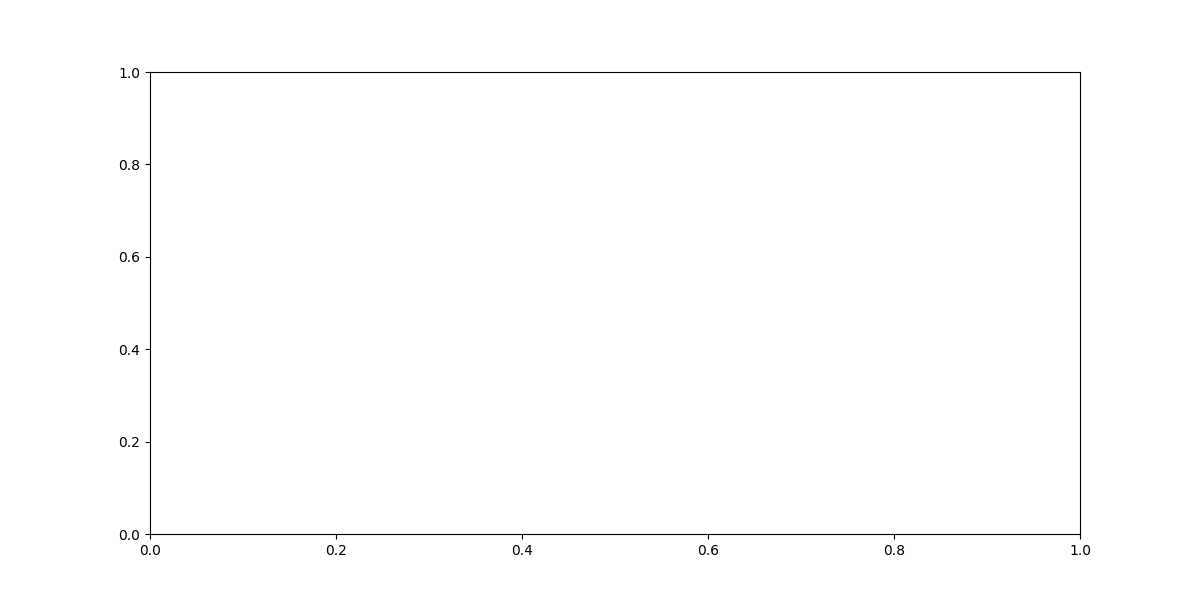

In [ ]:
### JAX OPTAX

import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import optax
import numpy as np

# Constituents definition remains the same
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821)
]

# Load the tide data from CSV - Keep the path to your tide data CSV file
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = jnp.array(tide_data['Verified (m)'].values)
times = jnp.array(tide_data['Seconds since epoch'].values)

# Convert amplitudes and phases
amplitudes = jnp.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = jnp.array([phase for _, _, phase, _ in constituents]) * jnp.pi / 180
speeds = jnp.array([speed for _, _, _, speed in constituents]) * jnp.pi / 180 / 3600

# Prediction function using JAX
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function using JAX
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

# Gradient of the loss function
grad_loss_fn = jax.grad(loss_fn)

# Initialize the optimizer with Optax
optimizer = optax.adam(learning_rate=0.01)
initial_params = jnp.concatenate([amplitudes, phases])
opt_state = optimizer.init(initial_params)

# Optimization loop
for iteration in range(1000):  # You may want to adjust the number of iterations
    grads = grad_loss_fn(initial_params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    initial_params = optax.apply_updates(initial_params, updates)

# Extract optimized amplitudes and phases
optimized_amplitudes = initial_params[:len(speeds)]
optimized_phases = initial_params[len(speeds):]

# For the plotting and predictions with the new NOAA data, make sure you convert
# the data into JAX arrays if they are not already in that format. 

# Assume you have NOAA data loaded similarly to the initial data and converted to JAX arrays where necessary.
# Replace the plotting section with the appropriate JAX array conversions.

# Example Plotting (Ensure your data is correctly formatted for plotting)
# This part is just an example and may need adjustments based on your actual NOAA data loading code
plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Initial Prediction', marker='o')
plt.plot(timestamps, predicted_optimized, label='Optimized Prediction', marker='x')
# Ensure noaa_timestamps and noaa_verified_heights are converted to appropriate formats for plotting
plt.plot(noaa_timestamps, noaa_verified_heights, label='NOAA Verified (New Data)', marker='s', linestyle='--', color='red')
plt.xlabel('Hour of the Day on 10/01/2024')
plt.ylabel('Tide Height (meters)')
plt.title('24-Hour Tide Height Prediction Before and After Optimization with New NOAA Verified Data')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout() # Adjust layout to prevent clipping of tick labels
plt.show()


In [28]:
pip install ipympl


   ---------------------------------------- 0.0/511.6 kB ? eta -:--:--
    --------------------------------------- 10.2/511.6 kB ? eta -:--:--
   ----------- ---------------------------- 143.4/511.6 kB 1.7 MB/s eta 0:00:01
   -------------------------- ------------- 337.9/511.6 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------  501.8/511.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 511.6/511.6 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ----------------------------------- ---- 122.9/139.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 139.4/139.4 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   -------------------- ------------------- 112.6/215.0 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 215.0/215.0 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---

Optimisation réussie.
RMSE for optimized predictions: 0.04937862912559999
RMSE with 1 constituents: 0.6008676192923453
RMSE with 2 constituents: 0.450645085056698
RMSE with 3 constituents: 0.25045526856309297
RMSE with 4 constituents: 0.029374618451802444
RMSE with 5 constituents: 0.011058272284636341
RMSE with 6 constituents: 0.011046070702542881
RMSE with 7 constituents: 0.010210574306134637
RMSE with 8 constituents: 0.008685568112140362
RMSE with 9 constituents: 0.008964447890691214
RMSE with 10 constituents: 0.008690806838106866
RMSE with 11 constituents: 0.008688011075268886
RMSE with 12 constituents: 0.008622616164920957
RMSE with 13 constituents: 0.008619866204852625
RMSE with 14 constituents: 0.008683508740809377
RMSE with 15 constituents: 0.008772607338616682
RMSE with 16 constituents: 0.00879937388079236
RMSE with 17 constituents: 0.008822267055537234
RMSE with 18 constituents: 0.008597644391691245
RMSE with 19 constituents: 0.008767065064253645
RMSE with 20 constituents: 0.0

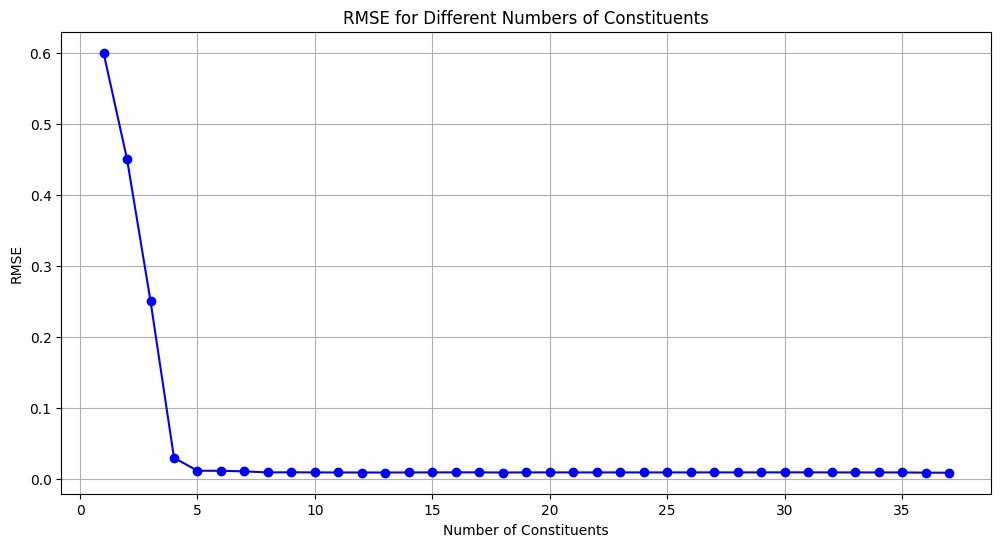

In [21]:
### Tester différentes combinaisons de constituants

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Définir les constituants
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Charger les données de marée à partir du CSV
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combinaison de la date et de l'heure en une colonne datetime et conversion en secondes depuis l'époque
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extraction des hauteurs et des temps observés
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convertir les amplitudes de pieds en mètres et les phases de degrés en radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Fonction de prédiction
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Fonction de perte
def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Paramètres initiaux
initial_params = np.concatenate([amplitudes, phases])

# Lancer l'optimiseur
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),  # Assurez-vous de passer speeds
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimisation réussie.")
else:
    print("Échec de l'optimisation.")

# Charger les nouvelles données NOAA
noaa_data_path = '10-01-2023.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Générer des timestamps pour les prédictions
start_datetime = datetime(2024, 1, 10)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Prédire les hauteurs de marée pour ces moments en utilisant les paramètres initiaux et optimisés
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse_optimized = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE for optimized predictions: {rmse_optimized}")

# Modification de la fonction de test pour ajuster dynamiquement les speeds
def test_constituents_combinations(constituents, observed_heights, times):
    rmse_results = []
    for num_constituents in range(1, len(constituents) + 1):
        selected_constituents = constituents[:num_constituents]
        amplitudes = np.array([amp for _, amp, _, _ in selected_constituents]) * 0.3048
        phases = np.array([phase for _, _, phase, _ in selected_constituents]) * np.pi / 180
        speeds = np.array([speed for _, _, _, speed in selected_constituents]) * np.pi / 180 / 3600
        initial_params = np.concatenate([amplitudes, phases])

        res = minimize(
            fun=loss_fn,
            x0=initial_params,
            args=(times_since_epoch, observed_heights, speeds),
            method='L-BFGS-B',
            options={'maxfun': 50000, 'maxiter': 50000}
        )
        
        if res.success:
            optimized_params = res.x
            optimized_amplitudes = optimized_params[:num_constituents]
            optimized_phases = optimized_params[num_constituents:]
            predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)
            rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
            rmse_results.append(rmse)
            print(f"RMSE with {num_constituents} constituents: {rmse}")
        else:
            rmse_results.append(float('inf'))
            print(f"Optimization failed for {num_constituents} constituents.")

    return rmse_results

rmse_results = test_constituents_combinations(constituents, noaa_verified_heights, times_since_epoch)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(constituents) + 1), rmse_results, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Constituents')
plt.ylabel('RMSE')
plt.title('RMSE for Different Numbers of Constituents')
plt.grid(True)
plt.show()


Optimization successful.
Optimization time: 0:07:14.463832
RMSE for the entire month: 0.26418867110047467


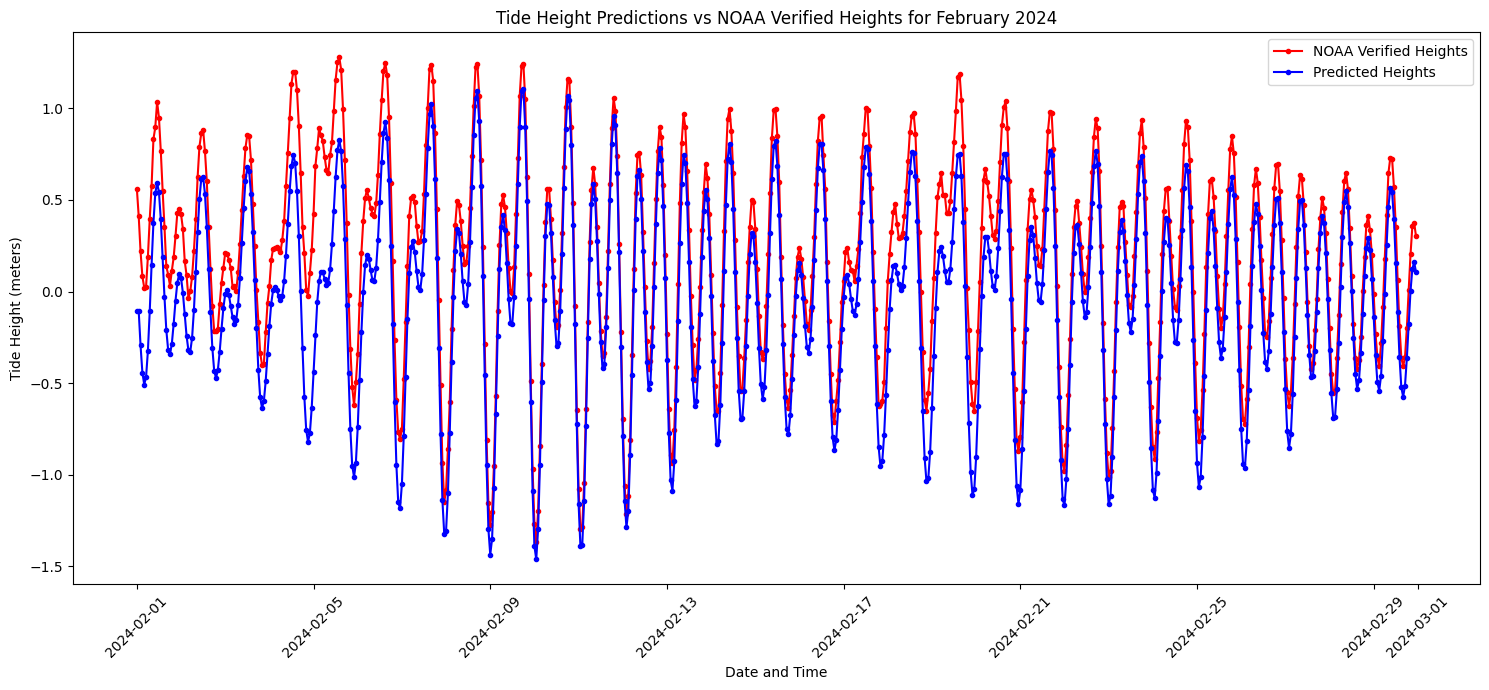

In [26]:
### Pour tout le mois

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the constituents
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Load the tide data from CSV
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Convert amplitudes from feet to meters and phases from degrees to radians
amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

# Prediction function
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function
def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

# Initial parameters
initial_params = np.concatenate([amplitudes, phases])

# Marquer le début de l'optimisation
start_time = datetime.now()

# Run the optimizer
res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

# Marquer la fin de l'optimisation
end_time = datetime.now()

# Calculer la durée
duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

# Load the NOAA data for the entire month
noaa_data_path = 'fevrierNOAA.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_seconds_since_epoch = (noaa_data['Datetime'] - epoch).dt.total_seconds().values
noaa_verified_heights = noaa_data['Verified (m)'].values

# Generate timestamps for predictions over the entire month
start_datetime = noaa_data['Datetime'].min()  # Start of NOAA data
end_datetime = noaa_data['Datetime'].max()    # End of NOAA data
total_hours = int((end_datetime - start_datetime).total_seconds() / 3600) + 1
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(total_hours)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using optimized parameters
predicted_heights = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Calculate RMSE for the entire month
def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

# Align predictions with NOAA verified heights
aligned_predicted_heights = np.interp(noaa_seconds_since_epoch, times_since_epoch, predicted_heights)
rmse = calculate_rmse(noaa_verified_heights, aligned_predicted_heights)
print(f"RMSE for the entire month: {rmse}")

# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(noaa_data['Datetime'], noaa_verified_heights, label='NOAA Verified Heights', marker='.', linestyle='-', color='red')
plt.plot(noaa_data['Datetime'], aligned_predicted_heights, label='Predicted Heights', marker='.', linestyle='-', color='blue')
plt.xlabel('Date and Time')
plt.ylabel('Tide Height (meters)')
plt.title('Tide Height Predictions vs NOAA Verified Heights for February 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()





Optimization successful.

Optimization time: 0:00:01.741130

RMSE for the entire month: 0.2484156185445127

Optimization successful.

Optimization time: 0:07:14.463832

RMSE for the entire month: 0.26418867110047467